## Week 3 데이터분석 및 시각화도구 리뷰 (2) 실습자료

### Seaborn (Statistical Data Visualization)으로 시각화하기

#### Seaborn이란? 
- matplotlib을 기반으로하는 Python 시각화 패키지
- 통계적 그래픽을 제공하는 고차원의 인터페이스 제공

#### 예제1: “tips” 데이터로 boxplot 그리기

- (1) seaborn 패키지 가져오기
- (2) seaborn 스타일 옵션 설정
- (3) seaborn 내장 데이터셋“tips”로드
   --> seaborn 라이브러리의 내장 데이터셋인 'tips'는 pandas.DataFrame형의 변수

In [1]:
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')

data=sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
data['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:>

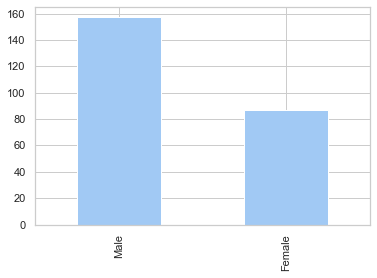

In [3]:
# 팁을 남자가 많이 주는지 여자가 많이 주는지 남녀수를 count하여 bar 차트를 그려봅시다.

#지난 시간에 배운 방법입니다. 여자보단 남자
data['sex'].value_counts().plot(kind='bar')

#### (참고) catplot으로 그리기

- seaborn catplot(kind='count')을 활용한 방법

C:\Users\wjaud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


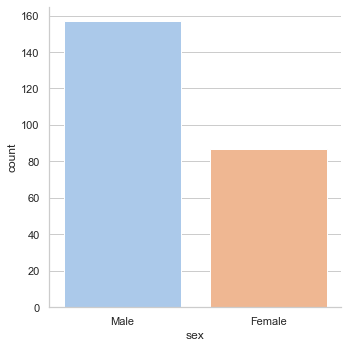

In [4]:
sns.catplot('sex', data=data, kind='count')

C:\Users\wjaud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


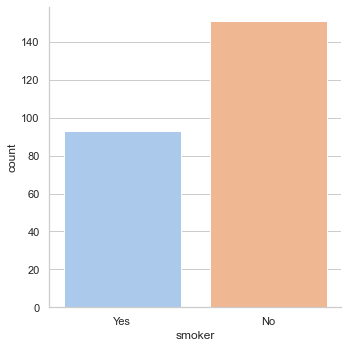

In [5]:
#흡연자보단 비흡연자
sns.catplot('smoker', data=data, kind='count')

C:\Users\wjaud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


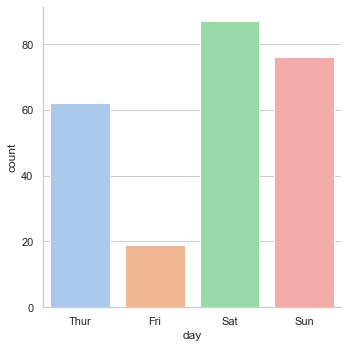

In [6]:
# 토툐일>일요일>목요일>금요일
sns.catplot('day', data=data, kind='count')

C:\Users\wjaud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


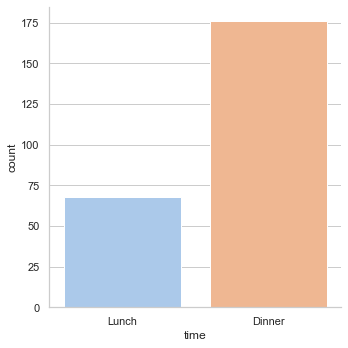

In [7]:
#점심보단 저녁
sns.catplot('time', data=data, kind='count')

- [질문] 요일별로/성별로 팁을 주는 사람들은 얼마나 있었을까요?

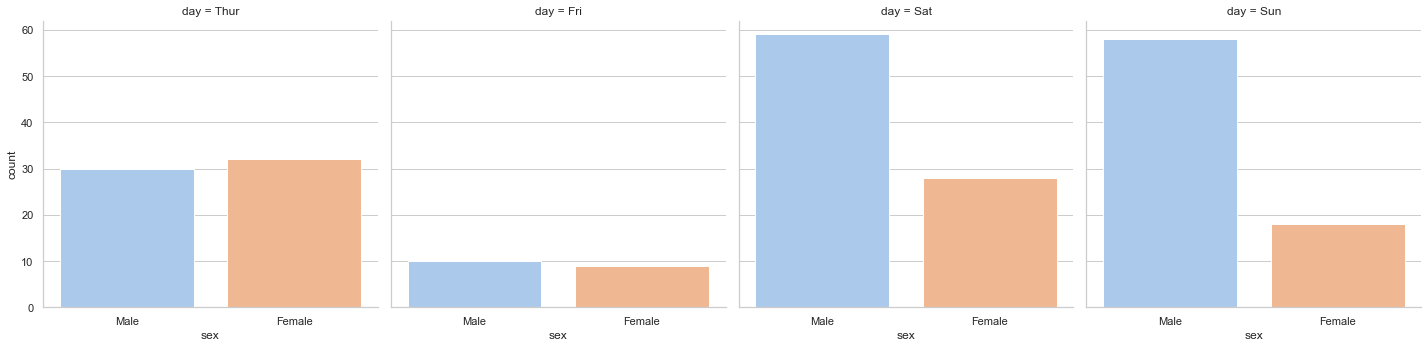

In [8]:
sns.catplot(x='sex', data=data, kind='count', col='day')

- (4) seaborn으로 boxplot 그리기 (요일 별 tip 박스플롯)

<AxesSubplot:xlabel='day', ylabel='tip'>

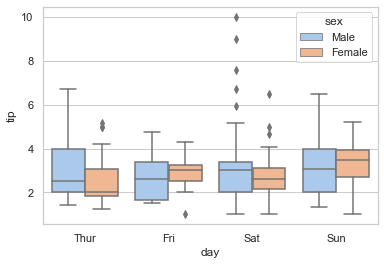

In [9]:
sns.boxplot(x='day', y='tip', hue='sex', data=data)

- (5) matplotlib(pandas)로 boxplot 그리기  (요일 별 tip 박스플롯)

<AxesSubplot:title={'center':'tip'}, xlabel='[day, sex]'>

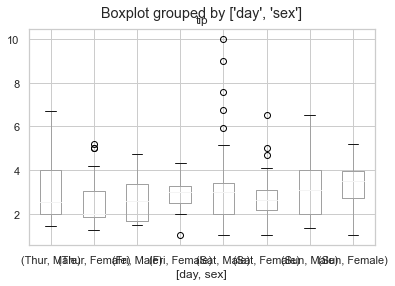

In [10]:
data.boxplot(column=['tip'], by=['day', 'sex'])

#### 예제2: “flights” 데이터로 heatmap 그리기

- (1) seaborn 패키지 가져오기
- (2) seaborn 스타일 옵션 설정
- (3) seaborn 내장 데이터셋“flights”로드
   --> seaborn 라이브러리의 내장 데이터셋인 'flights'는 pandas.DataFrame형의 변수

In [11]:
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')

data2=sns.load_dataset('flights')

data2

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


- (4) 데이터 pivot 시키기
   * index:"year"
   * column: "month"
   * value: "passenger"

In [12]:
pivoted_data=data2.pivot('year', 'month', 'passengers')
pivoted_data

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


- (5) 스타일 옵션 변경하기
- (6) Heatmap으로 나타내기
    * 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽으로 출력

findfont: Font family ['onospace'] not found. Falling back to DejaVu Sans.


<AxesSubplot:xlabel='month', ylabel='year'>

findfont: Font family ['onospace'] not found. Falling back to DejaVu Sans.


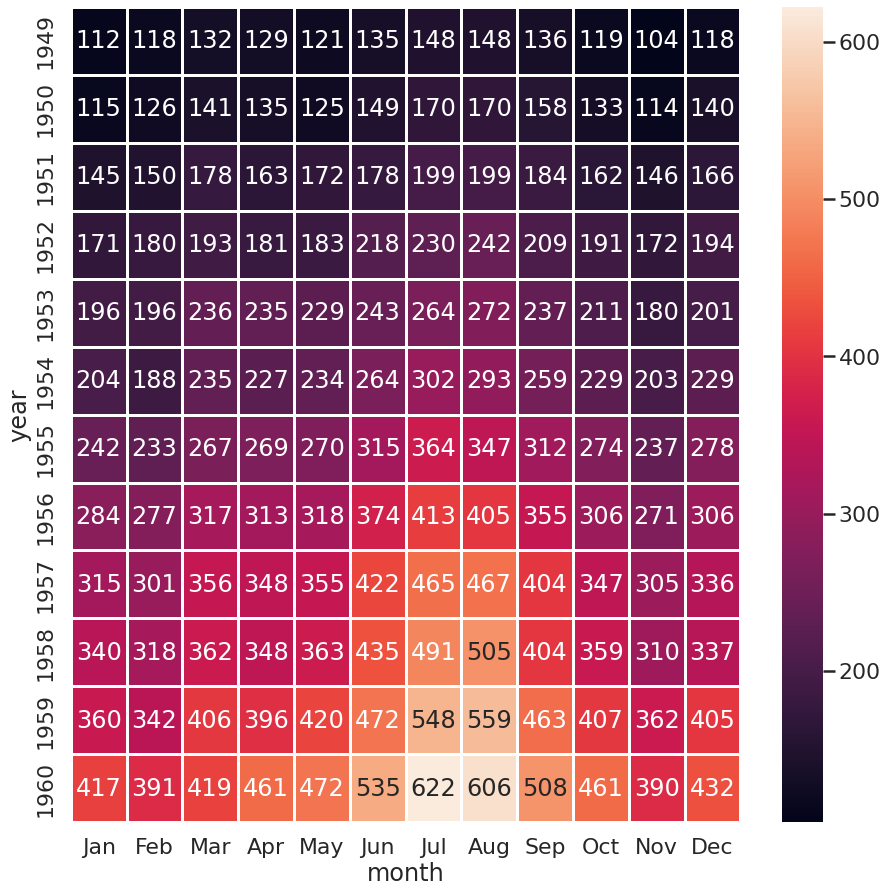

In [13]:
sns.set(context='poster', font='onospace', rc={'figure.figsize': (15,15)})
sns.heatmap(pivoted_data, annot=True, fmt='d', linewidth=3)  #annot=True로 해야 수치 표현도 가능, fmt: 수치의 형식과 소수점자리 명시

#### 예제3:  iris 데이터로 산점도 행렬 (Scatter_matrix) 그리기
- (1) seaborn 패키지 가져오기
- (2) seaborn 스타일 옵션 설정
- (3) seaborn 내장 데이터셋“iris”로드 

In [14]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- (4) 4개의 변수에 대한 산점도를 그리고, 대각원소 자리에 diag_kind='hist' 를 설정하여 각 변수별 히스토그램을 볼 수 있도록 설정 

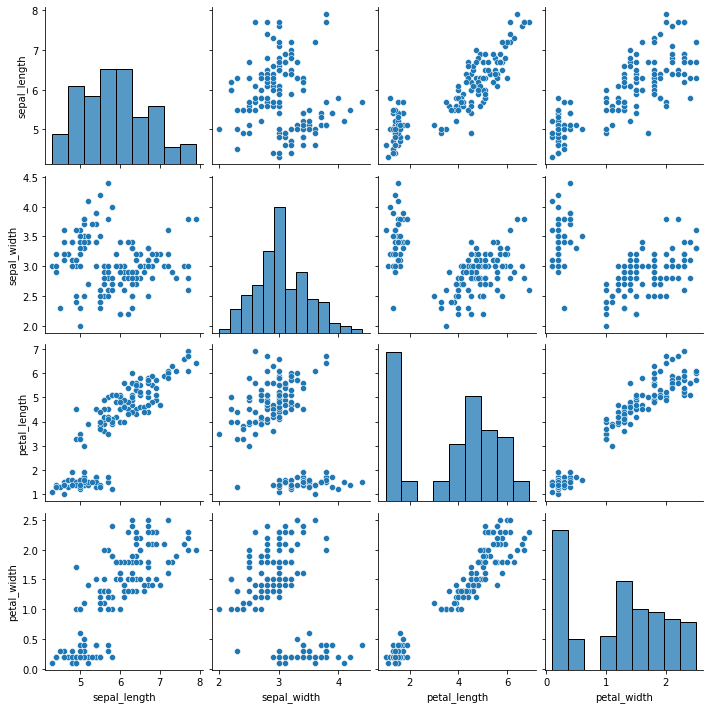

In [16]:
import matplotlib.pyplot as plt

sns.set()
sns.reset_orig()
sns.pairplot(iris, diag_kind='hist')
plt.show()

- (5) diag_kind='kde' 를 사용하여 각 변수별 커널밀도추정곡선을 볼 수 있게 설정
- (6) hue='species'를 사용하여 'species' 종(setosa, versicolor, virginica) 별로 색깔을 다르게 표시
- (7) 색은 palette 에 'bright', 'pastel', 'deep', 'muted', 'colorblind', 'dark' 중에서 가독성이 좋고 선호하는 색상으로 선택

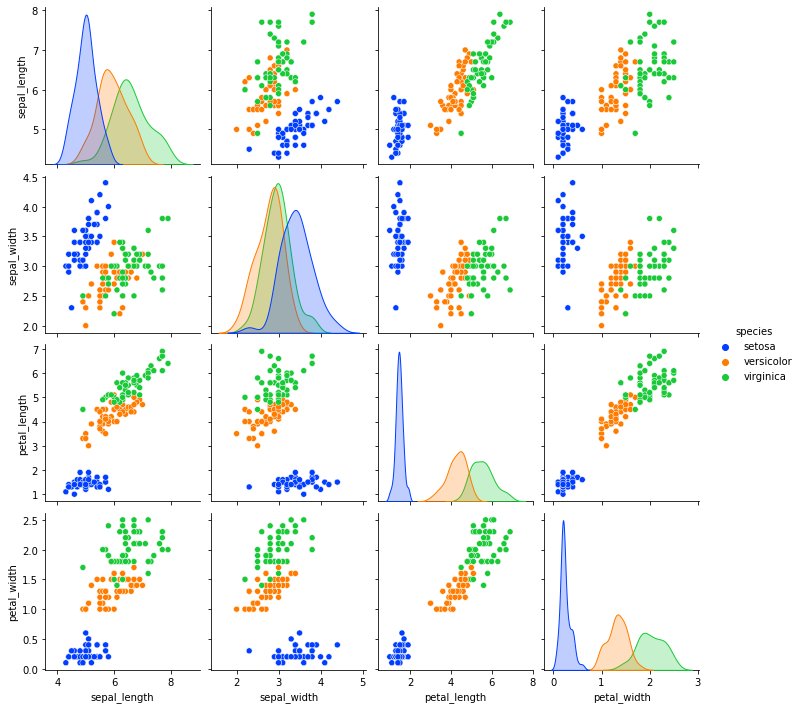

In [17]:
sns.pairplot(iris,
            diag_kind='kde',
            hue='species',
            palette='bright') #pastel, bright, deep, muted, colorblind, dark

plt.show()